<a href="https://colab.research.google.com/github/Poorna321288/Internship-assignments-/blob/main/Seq_Seq_network_Day_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython import get_ipython
from IPython.display import display

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

def generate_sequence_data(n_samples=1000, seq_len=5):
    X = []
    y = []
    for _ in range(n_samples):
        start = np.random.randint(0, 100)
        seq = np.arange(start, start + seq_len)
        X.append(seq)
        y.append(seq + 1)
    X = np.array(X) / 100.0  # Normalize
    y = np.array(y) / 100.0
    return X[..., np.newaxis], y[..., np.newaxis]

X_train, y_train = generate_sequence_data(1000)
X_val, y_val = generate_sequence_data(200)

def build_seq2seq_model(rnn_type="SimpleRNN", input_shape=(5, 1), hidden_units=32):
    model = tf.keras.Sequential()
    if rnn_type == "SimpleRNN":
        model.add(tf.keras.layers.SimpleRNN(hidden_units, return_sequences=True, input_shape=input_shape))
    elif rnn_type == "LSTM":
        model.add(tf.keras.layers.LSTM(hidden_units, return_sequences=True, input_shape=input_shape))
    elif rnn_type == "GRU":
        model.add(tf.keras.layers.GRU(hidden_units, return_sequences=True, input_shape=input_shape))
    else:
        raise ValueError("Invalid RNN type")

    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1)))
    model.compile(optimizer="adam", loss="mse")
    return model

def train_and_evaluate(model_name):
    print(f"\nTraining {model_name}...")
    model = build_seq2seq_model(model_name)
    history = model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=32,
        validation_data=(X_val, y_val),
        verbose=0
    )
    return history.history["loss"], history.history["val_loss"]

loss_rnn, val_loss_rnn = train_and_evaluate("SimpleRNN")
loss_lstm, val_loss_lstm = train_and_evaluate("LSTM")
loss_gru, val_loss_gru = train_and_evaluate("GRU")


Training SimpleRNN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training LSTM...

Training GRU...


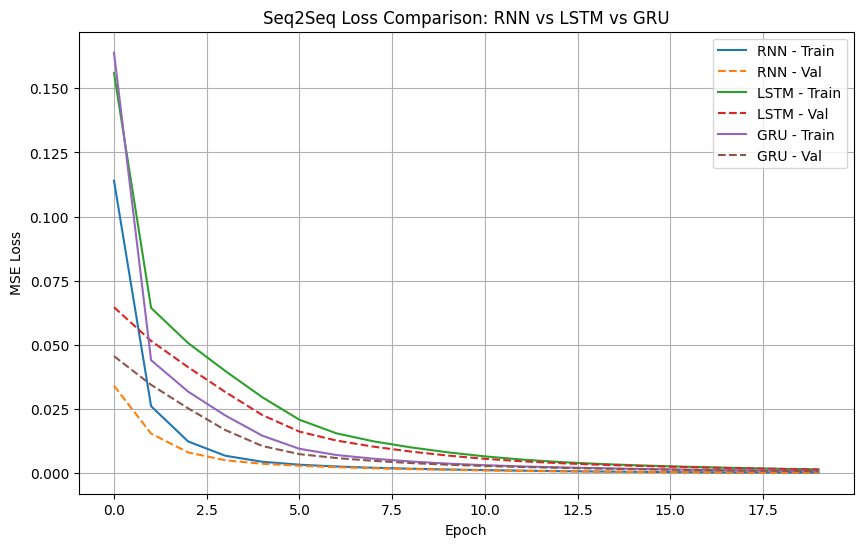

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(loss_rnn, label="RNN - Train")
plt.plot(val_loss_rnn, '--', label="RNN - Val")
plt.plot(loss_lstm, label="LSTM - Train")
plt.plot(val_loss_lstm, '--', label="LSTM - Val")
plt.plot(loss_gru, label="GRU - Train")
plt.plot(val_loss_gru, '--', label="GRU - Val")
plt.title("Seq2Seq Loss Comparison: RNN vs LSTM vs GRU")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()